In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import plotly.plotly as py
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.tools as tls
init_notebook_mode(connected=True) #plotly offline
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Abrir achivo em diferentes formatos

In [2]:
#Abrir un arhivo formato csv
# df = pd.read_csv(filepath_or_buffer='Arffs/java_train.csv',delimiter='\t')
# df = pd.read_csv(filepath_or_buffer='Arffs/thre=0123451.csv', delimiter='\t')

# Abrir un archivo formato arff 
# filename = "thre=0123451.arff"
# data = arff.loadarff(filename)
# df = pd.DataFrame(data[0])
# df.head()


 
df = pd.read_csv(filepath_or_buffer='Arffs/bigerthan_full.csv', delimiter='\t')
df.head()

,avg_degree_1,avg_path_1,pearson_1,avg_hier2_1,avg_hier3_1,avg_degree_2,avg_path_2,pearson_2,avg_hier2_2,avg_hier3_2,...,avg_hier2_9,avg_hier3_9,avg_degree_10,avg_path_10,pearson_10,avg_hier2_10,avg_hier3_10,paciente,name_class,class
0,5.271241,6.200294,-0.173087,220.191594,493.680892,5.272339,6.170127,-0.172457,217.418058,486.923467,...,17.348993,45.067114,3.566372,6.740374,-0.052109,13.265487,29.946903,TCGA_BH_A1EN.txt,cancer,0
1,5.295076,6.213815,-0.174844,220.101867,497.944368,5.291439,6.220724,-0.175197,215.433278,489.412543,...,20.055215,42.981595,2.711111,3.438384,0.026581,7.488889,15.022222,TCGA_E2_A1L7.txt,cancer,0
2,5.383317,6.195062,-0.175846,222.407398,495.412612,5.292042,6.208263,-0.175105,216.673448,487.988669,...,11.245902,33.745902,2.486111,4.274670,-0.033388,10.625000,32.750000,TCGA_BH_A1FJ.txt,cancer,0
3,5.249474,6.210622,-0.174010,214.487895,485.811842,5.247191,6.223727,-0.175855,208.791332,474.347245,...,6.220779,11.428571,2.202899,5.216539,-0.269464,5.898551,9.797101,TCGA_BH_A0DZ.txt,cancer,0
4,5.241010,6.195261,-0.167624,224.161183,509.164244,5.240246,6.198525,-0.167239,222.425565,506.122433,...,34.870387,101.206121,3.947761,6.808833,-0.140858,27.883085,82.509950,TCGA_E9_A1RH.txt,cancer,0


### Divide data into train and test

After train_test_split

You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the same two parameters μ and σ (values) that you used for centering the training set.

These methods are used to center/feature scale the given data. It basically helps to normalize the data within a particular range

For this, we use Z-score method.

Z-Score

We do this on the training set of data.

1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.

2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

Code snippet for Feature Scaling/Standardisation(after train_test_split).

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_tranform(X_train)
sc.tranform(X_test)
We apply the same(training set same two parameters μ and σ (values)) parameter transformation on our testing set.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# X = pcadf.iloc[:, 0:35]
# y = pcadf['class']
atr=30 #(t0-t5, melhor acc)
init=0 #0-5 , 5-10, 10-15, 15-20, 20-25, 25-30, 30-35, 35-40, 40-45, 45-50

X_todo = df.iloc[:, init:init+atr]#0:atr !!!IMPORTANTE
y_todo = df[['paciente','name_class','class']]
X_train, X_test, y_train, y_test = train_test_split(X_todo, y_todo, random_state=0)


# print(y) 
#You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the same two parameters μ and σ (values) that you used for centering the training set.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 
X_todo = MinMaxScaler().fit_transform(X_todo) 
print(type(X_train)) #<class 'numpy.ndarray'>
print(type(X_test)) #<class 'numpy.ndarray'>
print(type(y_train)) #<class 'pandas.core.frame.DataFrame'>
print(type(y_test)) #<class 'pandas.core.frame.DataFrame'>
# print(X_train.shape)#(157, 35)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## PCA

In [26]:
# x = df.iloc[:, 0:35].values #
# column = ['PCA'+str(i) for i in range(1,36)]
# y= df.loc[:,['class']].values
# x = StandardScaler().fit_transform(x)


# pca = PCA(n_components=35)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = column)

# pcadf = pd.concat([principalDf, df[['paciente']],df[['name_class']],df[['class']]], axis = 1)
# pcadf.head()

stdscaler = StandardScaler() 

xtrain = stdscaler.fit_transform(X_train)
xtest = stdscaler.transform(X_test)
xtodo = StandardScaler().fit_transform(X_todo)


y_dftrain = pd.DataFrame(data = (y_train.iloc[:,0:3]).values, columns = ['paciente','name_class', 'class'])
y_dftest = pd.DataFrame(data = (y_test.iloc[:,0:3]).values, columns = ['paciente','name_class', 'class'])
 

pca = PCA(n_components=atr)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_todo = PCA(n_components=atr).fit_transform(xtodo)

colunas= ['PCA'+str(i) for i in range(0,atr)]

principalDf_train = pd.DataFrame(data = pca_train, columns =colunas) #(157, 35)
principalDf_test = pd.DataFrame(data = pca_test, columns = colunas) #(157, 35)
principalDf_todo = pd.DataFrame(data = pca_todo, columns = colunas) #(157, 35)
 
pca_todo = pd.concat([principalDf_todo, y_todo[['paciente']],y_todo[['name_class']],y_todo[['class']]], axis = 1) 
print(pca_train.shape)#(157, 38)
print(pca_test.shape)#(53, 38)
print(pca_todo.shape)#(210, 38)
pca_todo.tail()



(157, 30)
(53, 30)
(210, 33)


,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,paciente,name_class,class
205,1.937362,6.421862,0.977430,0.107130,1.418519,-0.910942,0.750026,-0.207347,-0.692016,0.747657,...,-0.436546,0.264209,-0.101465,0.096235,-0.124494,0.049673,0.017233,TCGA_BH_A0H9.txt,normal,1
206,-2.515268,-1.507175,-1.613446,-0.611225,1.524992,-1.249691,0.032461,0.271325,-0.756813,0.551014,...,0.181020,-0.029446,0.066851,0.021531,-0.069209,-0.060489,0.007815,TCGA_E2_A1LB.txt,normal,1
207,0.027387,-1.641346,-0.147550,-0.687138,-0.117609,-0.490672,0.781149,-0.185502,-0.108398,0.091376,...,0.200839,0.188333,-0.058114,-0.019640,0.107218,0.110005,-0.023979,TCGA_AC_A2FM.txt,normal,1
208,-4.575659,-3.374388,0.012947,1.328284,-0.504821,0.189053,1.845128,-0.553972,0.115484,-0.459751,...,0.008147,-0.239242,-0.114961,0.179190,0.022514,0.048036,-0.004074,TCGA_BH_A0DT.txt,normal,1
209,-8.256455,-0.144732,0.146869,0.690590,-1.294743,-0.733832,2.637818,0.799730,1.064450,0.327362,...,0.110121,-0.111830,-0.331446,-0.007590,-0.031059,-0.033486,-0.006625,TCGA_E9_A1N9.txt,normal,1


### Save in diferent formats



In [ ]:
#save pca to arff
pcadf_save = pd.concat([principalDf_todo,df[['name_class']]], axis = 1)
import arff 
# arff.dump('Arffs/>/pca_classicalthre=0.001.arff', pcadf_save.values, relation='thre=0.001', names=pcadf_save.columns)
arff.dump('Arffs/>/pca_t0t9.arff', pcadf_save.values, relation='t0t9', names=pcadf_save.columns)
#save to csv
# df = pd.concat([data, col1['paciente'], col2['name_class'],col3['class']], axis = 1)
# df.to_csv('Arffs/thre=0123451.csv', sep='\t', index=False)

### Plotly

In [ ]:
gb = pca_todo.groupby('name_class')
groups = dict(list(gb))
group = set(pca_todo['name_class'])


data = [go.Scatter(x=groups[g].PCA0, y=groups[g].PCA1,
                   mode='markers', text= groups[g].name_class+" "+groups[g].paciente, name=g) 
        for g in group ]

layout = go.Layout(title='', xaxis={'title': 'PCA1'}, yaxis={'title': 'PCA2'}, width=700,height=700)




fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='pca1_pca2')

## TSNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
 
x = df.iloc[:, 0:atr].values #
y= df.loc[:,['class']].values

X_embedded = TSNE(n_components=2).fit_transform(x)
X_embedded.shape


## NO- dimensionality reduction

In [ ]:
x = df.iloc[:, 0:atr].values #
y= df.loc[:,['class']].values
x = StandardScaler().fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [23]:
#https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


def plot_boundary(X, y, clf):
#     X_mat = X[['PCA1','PCA2']].values
    X_mat = X[:, (0,1)] 
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#9ABBD9', '#F7BA89']) #MESH
    cmap_bold  = ListedColormap(['#5999D4', '#EB7D30']) # SCATTER

    #clf = KNeighborsClassifier(n_neighbors, weights=weights)
    #clf = LogisticRegression()
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('1st principal component', fontsize = 15)
    ax.set_ylabel('2nd principal component', fontsize = 15)
    #ax.set_title('2 component PCA', fontsize = 20)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
     
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    print('xmin= %f, xmax=%f; ymin=%f,ymax=%f'%(xx.min(), xx.max(), yy.min(), yy.max()))

    patch0 = mpatches.Patch(color='#5999D4', label='tumor')
    patch1 = mpatches.Patch(color='#EB7D30', label='normal') 
    #plt.legend(handles=[patch0, patch1])

        
    plt.xlabel('1st principal component')
    plt.ylabel('2nd principal component')
    #plt.title('classification')
    fig.savefig('Arffs/>/LinearSVC.png', bbox_inches='tight', dpi = 300)

    plt.show()


In [27]:

x = pca_todo.iloc[:, 0:atr]
y = y_todo['class']


In [ ]:
ytr = y_train.loc[:,['class']].values.ravel()
yte = y_test.loc[:,['class']].values.ravel()


xmin= -9.256455, xmax=10.743545; ymin=-5.495178,ymax=9.664822


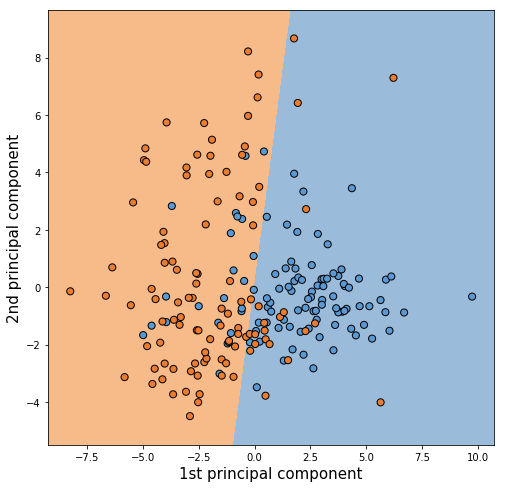

In [28]:
from sklearn.svm import SVC
from sklearn import svm
# knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
# logreg = LogisticRegression()
# lda = LinearDiscriminantAnalysis()
svm = svm.LinearSVC()
# knn = KNeighborsClassifier()
# lda = LinearDiscriminantAnalysis() 
# svm = svm.SVC(kernel='poly')

# plot_boundary(X_train, y_train, lda)

x = pca_todo.iloc[:, 0:atr]
y = y_todo['class']


plot_boundary(x.values, y,svm)


## Support vector machine

In [ ]:
from sklearn import svm


# svm = svm.SVC(gamma='scale')
svm = svm.LinearSVC()
# svm = svm.SVC(kernel='poly')
# svm = svm.SVR()
svm.fit(pca_train, ytr)  
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(pca_train, ytr)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(pca_test, yte)))



clf.fit(X_train, y_train)
y_pred = clf.predict(pca_test)
#Accuracy
print("Accuracy", metrics.accuracy_score(pca_test, yte))
#AUC Curve
y_pred_proba = clf.predict_proba(pca_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(pca_test,  y_pred_proba)
auc = metrics.roc_auc_score(pca_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
# svm = svm.SVC(kernel='poly')
svm = svm.LinearSVC()
# svm = svm.SVC(gamma='scale') #No funca
scores = cross_val_score(svm, x, y, cv=10)
print("\nSupport vector machine")
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: %.2f +/- %.2f"%(scores.mean()*100, scores.std()*100)) 


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(pca_test)
print(confusion_matrix(yte, pred))
print(classification_report(yte, pred))

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis() 
lda.fit(pca_train, ytr)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(pca_train, ytr)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(pca_test, yte)))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(pca_test)
print(confusion_matrix(yte, pred))
print(classification_report(yte, pred))

In [ ]:
from sklearn.model_selection import cross_val_score
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda,x, y, cv=10)
print("\nLDA")
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: %.2f +/- %.2f"%(scores.mean(), scores.std())) 

## Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(pca_train, ytr)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(pca_train, ytr)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(pca_test, yte)))

In [ ]:
from sklearn.model_selection import cross_val_score 
# scores = cross_val_score(knn, X_todo, y, cv=10)
scores = cross_val_score(lda,x, y, cv=10)
print("\nSupport vector machine")
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: %.2f +/- %.2f"%(scores.mean(), scores.std())) 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(pca_test)
print(confusion_matrix(yte, pred))
print(classification_report(yte, pred))

## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(pca_train, ytr)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(pca_train, ytr)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(pca_test, yte)))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(pca_train, ytr)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dtree.score(pca_train, ytr)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(pca_test, yte)))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lda,x, y, cv=10)
print("\nDecision Tree")
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: %.2f +/- %.2f"%(scores.mean(), scores.std())) 

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(pca_train, ytr)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(pca_train, ytr)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(pca_test, yte)))

In [ ]:
# Logistic Regression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, pca_train, ytr, cv=10)
print("\nLogistic Regression")
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: %.2f +/- %.2f"%(scores.mean(), scores.std())) 